<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week4/week4_%EC%96%BC%EA%B5%B4%EC%97%90%EC%8A%A4%ED%8B%B0%EC%BB%A4(%EC%95%88%EA%B2%BD)%EB%B6%99%EC%9D%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 얼굴에 스티커(안경) 붙이기

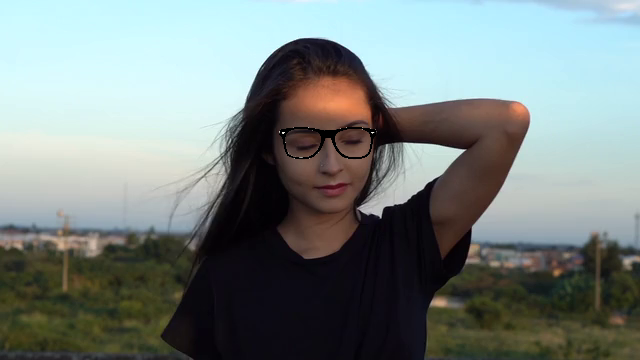

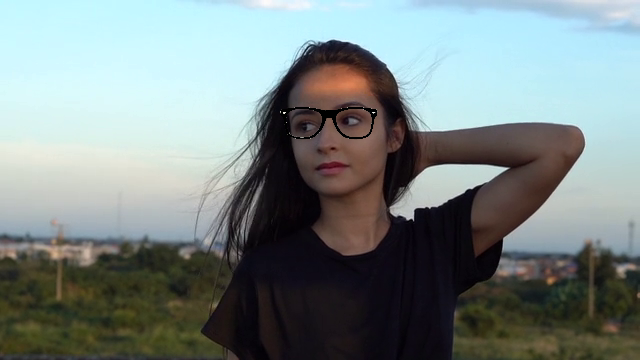

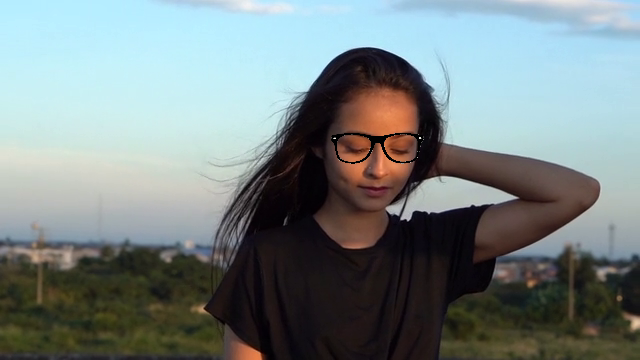

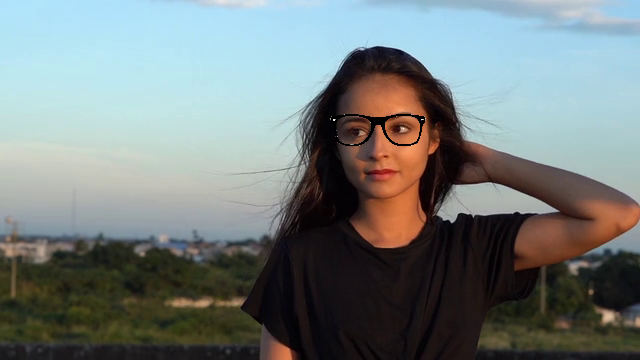

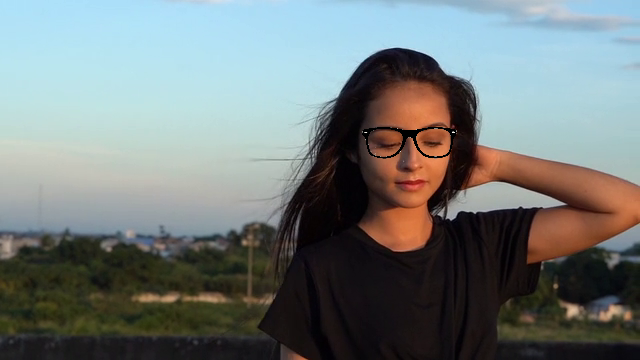

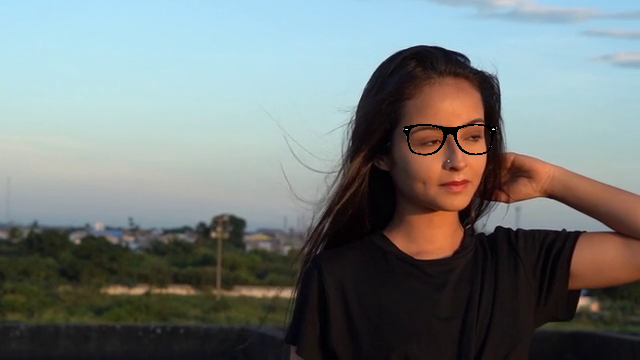

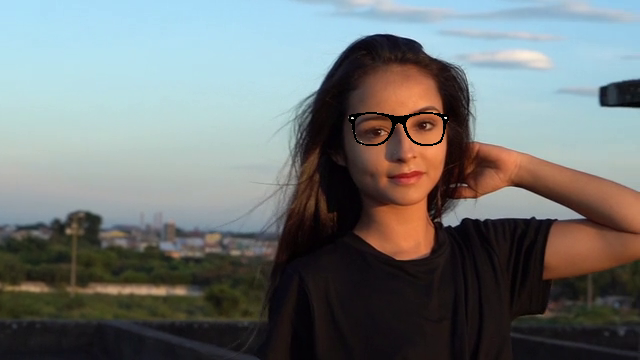

All frames are 605


In [1]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

detector= dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')

cap=cv2.VideoCapture('videos/01.mp4');
sticker_img = cv2.imread('imgs/glasses.png',cv2.IMREAD_UNCHANGED);

f=0
while True:
    ret, img = cap.read()

    if ret == False:
        break

    # 얼굴영역 탐지하기
    dets = detector(img)
    # print("number of faces detected:", len(dets))

    # 사람 별로 얼굴에 안경 붙이기
    for det in dets:
      shape = predictor(img,det);
      try:
        glasses_x1 = shape.parts()[2].x - 20
        glasses_x2 = shape.parts()[0].x + 20

        h, w, c = sticker_img.shape

        glasses_w = glasses_x2 - glasses_x1
        glasses_h = int(h / w * glasses_w)

        center_y = (shape.parts()[0].y + shape.parts()[2].y) / 2

        glasses_y1 = int(center_y - glasses_h / 2)
        glasses_y2 = glasses_y1 + glasses_h

        overlay_img = sticker_img.copy()
        overlay_img = cv2.resize(overlay_img, dsize=(glasses_w, glasses_h))

        overlay_alpha = overlay_img[:, :, 3:4] / 255.0
        background_alpha = 1.0 - overlay_alpha

        img[glasses_y1:glasses_y2, glasses_x1:glasses_x2] = overlay_alpha * overlay_img[:, :, :3] + background_alpha * img[glasses_y1:glasses_y2, glasses_x1:glasses_x2]
      except:
        pass

    # 이미지 출력
    if f%100==0:
      cv2_imshow(img)
    f=f+1;
    # cv2.imshow('result', img)
    # if cv2.waitKey(1) == ord('q'):
    #     break
  
print("All frames are "+ str(f))